In [1]:

import pygame
import random
import os
import time
import numpy as np
import math
import torch
import torch.nn.functional
import matplotlib.pyplot as plt
import torch.optim as opt
from torch.autograd import Variable
from sklearn.model_selection import train_test_split

import scipy.stats as st
from sklearn.datasets.samples_generator import make_blobs
from matplotlib.colors import LogNorm 
import matplotlib.cm as cm
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt


if torch.cuda.is_available():  
    dev = "cuda:0" 
else:  
    dev = "cpu"  

print(dev)


pygame 2.0.1 (SDL 2.0.14, Python 3.8.3)
Hello from the pygame community. https://www.pygame.org/contribute.html
cuda:0


D:\ComputerSoftwares\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
global target_order
target_order = "supervised"
global temp_list
temp_list = []
Agent_number_n=4;
Alpha = 0.666;



In [3]:
global temp_list
temp_list = []
def appen(_x_list,y):
    global temp_list
    temp_list.append(_x_list)
    
def appen_train(x_list):
    global temp_list
                
    S= max(sum(x_list),1.0);
    temp_list = []
    
    for i in range(Agent_number_n):
        temp = []
        for j in range(Agent_number_n):
            if(i!=j):
                temp.append(x_list[j])
        appen(temp,S)
    
    training_data.append(temp_list)
    training_label.append(S)
    

def read_training_data():
    for i in range(500000):
        appen_train(sorted(np.random.rand(Agent_number_n), reverse=True));

training_data=[]
training_label=[]
S=1.0
read_training_data();

def appen_test(x_list):
    global temp_list
                
    S= max(sum(x_list),1.0);
    temp_list = []
    
    for i in range(Agent_number_n):
        temp = []
        for j in range(Agent_number_n):
            if(i!=j):
                temp.append(x_list[j])
        appen(temp,S)
    testing_data.append(temp_list)
    testing_label.append(S)
    

def read_testing_data():
#     devided=20
#     for i1 in range(devided+1):
#         for i2 in range(i1+1):
#             for i3 in range(i2+1):
#                 appen_test(i1/devided,i2/devided,i3/devided);
    for i in range(100000):
        appen_test(sorted(np.random.rand(Agent_number_n), reverse=True));
                            

testing_data=[]
testing_label=[]
S=1.0
read_testing_data();

training_data=np.array(training_data)
training_label=np.array(training_label)
testing_data=np.array(testing_data)
testing_label=np.array(testing_label)
print(training_data)
print(testing_data)
print(training_label)
print(testing_label)

[[[0.87283934 0.40854436 0.30092435]
  [0.95166459 0.40854436 0.30092435]
  [0.95166459 0.87283934 0.30092435]
  [0.95166459 0.87283934 0.40854436]]

 [[0.60255114 0.53568718 0.50681477]
  [0.97491381 0.53568718 0.50681477]
  [0.97491381 0.60255114 0.50681477]
  [0.97491381 0.60255114 0.53568718]]

 [[0.80279728 0.5964004  0.40202904]
  [0.81551881 0.5964004  0.40202904]
  [0.81551881 0.80279728 0.40202904]
  [0.81551881 0.80279728 0.5964004 ]]

 ...

 [[0.91922896 0.85009364 0.22409439]
  [0.93998307 0.85009364 0.22409439]
  [0.93998307 0.91922896 0.22409439]
  [0.93998307 0.91922896 0.85009364]]

 [[0.58932495 0.23098974 0.02405151]
  [0.75393641 0.23098974 0.02405151]
  [0.75393641 0.58932495 0.02405151]
  [0.75393641 0.58932495 0.23098974]]

 [[0.69705378 0.68187245 0.08272199]
  [0.73059232 0.68187245 0.08272199]
  [0.73059232 0.69705378 0.08272199]
  [0.73059232 0.69705378 0.68187245]]]
[[[0.46524253 0.28915193 0.05513157]
  [0.51308436 0.28915193 0.05513157]
  [0.51308436 0.4652

In [4]:
def h_3_star(a, b, t):
    return a - min(a, t) + b - min(b, t) + max(min(a, t)+min(b, t), 2*t/3) + 1/2 * max(min(a, t)+min(b, t), t) - 1/2 * max(max(min(a, t), min(b, t)), 2*t/3) - t/6


def f_function(a, b, z):
    if(z >= 1):
        return (a+b)/2 + z/3
    else:
        return z/3 + h_3_star(a, b, 1-z)/2

def h_function(input_list):
    #input_list = sorted(input_list)
    g_list = []
    for j1 in range(len(input_list) ):
        for j2 in range(len(input_list)):
            if(j1 != j2):
                a = input_list[j1]
                b = input_list[j2]
                z = sum(input_list)- a-b

                g_list.append( f_function(a, b, z) * (Agent_number_n-1))
    h = sum(g_list) * 3 /  (Agent_number_n) /  (Agent_number_n-1) /  (Agent_number_n - 2)
    return h
                
                
x_list = []
y_list = []
z_list = []
result_list = []
training_supervised_label=[]
for index in range(len(training_data)):
    h_list = []
    for i in range(Agent_number_n):
        x_list.append(training_data[index][i][0])
        y_list.append(training_data[index][i][1])
        h = h_function(training_data[index][i])
        z_list.append(float(h))
        h_list.append(float(h))
    training_supervised_label.append(h_list)
    result_list.append(sum(h_list)/training_label[index]) 
    
    
print(max(result_list), min(result_list), max(result_list)-min(result_list))

3.3749816810682254 2.999999999999999 0.37498168106822627


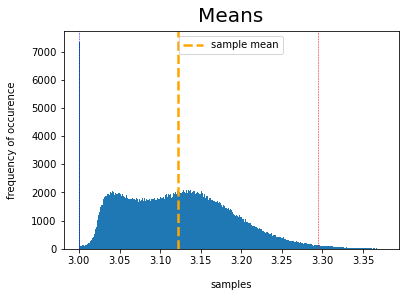

In [5]:
plt.hist(result_list,bins=500)

plt.title("Means", y=1.015, fontsize=20)
plt.axvline(x=sum(result_list)/len(result_list), linestyle='--', linewidth=2.5, label="sample mean", c='orange')
plt.xlabel("samples", labelpad=14)
plt.ylabel("frequency of occurence", labelpad=14)
plt.legend();

result_list.sort()

plt.axvline(x=result_list[int(len(result_list)*0.01)], linestyle='--', linewidth=0.5, label="1%", c='b')
plt.axvline(x=result_list[int(len(result_list)*0.99)], linestyle='--', linewidth=0.5, label="99%", c='r')


plt.show()

In [6]:
training_supervised_label=np.array(training_supervised_label)
print(training_supervised_label)

[[1.65057032 1.71954241 2.23474975 2.32891726]
 [1.81442146 2.1402388  2.19874476 2.22400812]
 [1.95048443 1.96161577 2.142802   2.31287694]
 ...
 [2.11923987 2.13739971 2.19789312 2.74564246]
 [0.83702235 0.93686866 1.38478767 1.68226139]
 [1.52437308 1.56000777 1.57898444 2.22082873]]


In [7]:
if torch.cuda.is_available():  
    dev = "cuda:0" 
else:  
    dev = "cpu"  

print(dev)


cuda:0


In [8]:
def weight_init(m):
    if isinstance(m, torch.nn.Conv2d):
        torch.nn.init.xavier_normal_(m.weight)
        torch.nn.init.zeros_(m.bias)
    elif isinstance(m, torch.nn.Linear):
        torch.nn.init.normal_(m.weight, mean=0.0,std =0.2)
        torch.nn.init.normal_(m.bias, mean=0.0,std =0.01)
#     elif isinstance(m, torch.nn.Parameter):
#         torch.nn.init.normal_(m, mean=0.0,std =0.1)

        

class Net(torch.nn.Module):
    def __init__(self):

        super(Net, self).__init__()
        
        self.input_dim = Agent_number_n-1
        self.hidden_dim = 50
        self.output_dim = 1
        self.hidden_layer_count = 8
        
        current_dim = self.input_dim
        self.layers = torch.nn.ModuleList()
        for i in range(self.hidden_layer_count):
            self.layers.append(torch.nn.Linear(current_dim, self.hidden_dim))
            current_dim = self.hidden_dim
        self.layers.append(torch.nn.Linear(current_dim, self.output_dim))

    def calculate(self, value_list):
        h = value_list
        for layer in self.layers:
            h = torch.relu(layer(h))
        return h

    def forward(self, input_list,input_label,label):
        global iteration,echo,target_order
        loss1 = 0
        loss2 = 0
        input_list = torch.from_numpy(
            np.array(input_list)).cuda().type(torch.float32)
        h_list = []

        if (target_order == "supervised"):
            loss = 0 
            for i in range(Agent_number_n):
                h = self.calculate(input_list[i])
                loss += torch.square(h - label[i])
                h_list.append(h)
            return loss
        else:
            for i in range(Agent_number_n):
                h = self.calculate(input_list[i])
                h_list.append(h)
            input_label = torch.from_numpy(
                np.array(input_label)).cuda().type(torch.float32)
            sum_h = torch.sum(torch.cat(h_list)).cuda()


            loss1 = torch.where((Agent_number_n-1)*input_label>sum_h,
                            torch.square(((Agent_number_n-1)*input_label-sum_h)),
                            torch.zeros(1).cuda()
                          )

            loss2 = torch.where((Agent_number_n-Alpha)*input_label<sum_h,
                            torch.square((sum_h-(Agent_number_n-Alpha)*input_label)),
                            torch.zeros(1).cuda()
                          )

            return loss1,loss2,h_list

In [9]:
random.seed(2000)
torch.manual_seed(256)
net  = Net()
net.apply(weight_init)

net = torch.load("save/Deep_learning_small_5_4")
net.to(dev)

Net(
  (layers): ModuleList(
    (0): Linear(in_features=3, out_features=50, bias=True)
    (1): Linear(in_features=50, out_features=50, bias=True)
    (2): Linear(in_features=50, out_features=50, bias=True)
    (3): Linear(in_features=50, out_features=50, bias=True)
    (4): Linear(in_features=50, out_features=50, bias=True)
    (5): Linear(in_features=50, out_features=50, bias=True)
    (6): Linear(in_features=50, out_features=50, bias=True)
    (7): Linear(in_features=50, out_features=50, bias=True)
    (8): Linear(in_features=50, out_features=1, bias=True)
  )
)

In [10]:
#optimizer = opt.RMSprop(net.parameters(), lr=0.00001)
#optimizer = opt.SGD(net.parameters(), lr=0.00001)
optimizer = opt.Adam(net.parameters(), lr=0.00001)

batch_size = 64
echo = 0

In [11]:
target_order = "supervised"
for iteration in range(int(echo)):
    # offender_types = []
    # defender_types = []
    
    
    X_train_list = []
    temp_number = 0
    total_batch_loss = 0 
    while(temp_number<len(training_data)-1):
        loss_sum = 0
        denominator = 0
        for index in range(temp_number, min(batch_size+temp_number,len(training_data))):
            h_loss = net(training_data[index],training_label[index],training_supervised_label[index])
            denominator += 1
            loss_sum += h_loss
            
        loss = (loss_sum) / denominator 
        total_batch_loss +=float(loss_sum)
        optimizer.zero_grad()
        
        loss.backward()
        
        optimizer.step()
        
        temp_number = index
        
        if(random.random()<=0.01):
            print(temp_number,loss,float(loss_sum))


    print("batch iteration", iteration)
    print("batch_loss: %.2f " % (total_batch_loss/len(training_data)))
    
    print()
    print()

In [12]:
denominator = 0
result_list = []
for index in range(len(testing_data)):
    h_list = []
    for i in range(Agent_number_n):
        h = net.calculate(torch.tensor(testing_data[index][i]).cuda().type(torch.float32))
        h_list.append(float(h))
    
    #print(sum(h_list),h_list,sum(h_list)/testing_label[index])
    result_list.append(sum(h_list)/testing_label[index])
    

print(max(result_list),min(result_list),max(result_list)-min(result_list))

3.412081048299167 2.933557450771332 0.47852359752783524


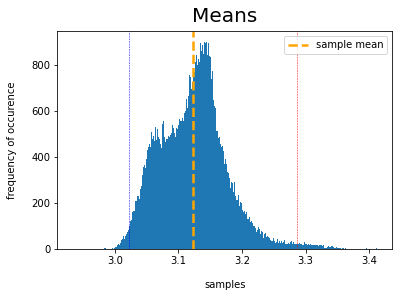

In [13]:
plt.hist(result_list,bins=500)

plt.title("Means", y=1.015, fontsize=20)
plt.axvline(x=sum(result_list)/len(result_list), linestyle='--', linewidth=2.5, label="sample mean", c='orange')
plt.xlabel("samples", labelpad=14)
plt.ylabel("frequency of occurence", labelpad=14)
plt.legend();

result_list.sort()

plt.axvline(x=result_list[int(len(result_list)*0.01)], linestyle='--', linewidth=0.5, label="1%", c='b')
plt.axvline(x=result_list[int(len(result_list)*0.99)], linestyle='--', linewidth=0.5, label="99%", c='r')


plt.show()

In [14]:
torch.save(net, "save/Deep_learning_small_5_4")

In [15]:
#optimizer = opt.RMSprop(net.parameters(), lr=0.00001)
#optimizer = opt.SGD(net.parameters(), lr=0.00005)
optimizer = opt.Adam(net.parameters(), lr=0.001)

batch_size = 64
echo = 1

In [16]:
target_order = "unsupervised"
for iteration in range(int(echo)):
    # offender_types = []
    # defender_types = []
    
    
    X_train_list = []
    temp_number = 0
    total_batch_loss = 0 
    while(temp_number<len(training_data)-1):
        
        loss2_list = []
        loss1_sum = 0
        loss2_sum = 0
        denominator = 0
        for index in range(temp_number, min(batch_size+temp_number,len(training_data))):
            h_loss1,h_loss2,h_list = net(training_data[index],training_label[index],0)
            denominator += 1
            loss1_sum += h_loss1
            loss2_sum += h_loss2
            
        loss_sum = loss1_sum + loss2_sum
        loss = (loss_sum) / denominator 
        total_batch_loss +=float(loss_sum)
        optimizer.zero_grad()
        
        loss.backward()
        
        optimizer.step()
        
        temp_number = index
        
        if(random.random()<=0.01):
            print(temp_number,loss,float(loss1_sum),float(loss2_sum))


    print("batch iteration", iteration)
    print("batch_loss: %.2f " % (total_batch_loss/len(training_data)))
    
    print()
    print()

3024 tensor([0.0002], device='cuda:0', grad_fn=<DivBackward0>) 0.0 0.01433909684419632
4347 tensor([2.0975e-06], device='cuda:0', grad_fn=<DivBackward0>) 0.0 0.00013423978816717863
8883 tensor([1.6525e-06], device='cuda:0', grad_fn=<DivBackward0>) 0.0 0.00010575956548564136
13104 tensor([1.1932e-06], device='cuda:0', grad_fn=<DivBackward0>) 0.0 7.636169175384566e-05
16128 tensor([0.], device='cuda:0', grad_fn=<DivBackward0>) 0.0 0.0
25011 tensor([0.], device='cuda:0', grad_fn=<DivBackward0>) 0.0 0.0
35091 tensor([0.], device='cuda:0', grad_fn=<DivBackward0>) 0.0 0.0
36351 tensor([0.], device='cuda:0', grad_fn=<DivBackward0>) 0.0 0.0
36666 tensor([0.], device='cuda:0', grad_fn=<DivBackward0>) 0.0 0.0
56007 tensor([0.], device='cuda:0', grad_fn=<DivBackward0>) 0.0 0.0
68103 tensor([8.7922e-06], device='cuda:0', grad_fn=<DivBackward0>) 0.0 0.000562700442969799
68166 tensor([7.0151e-07], device='cuda:0', grad_fn=<DivBackward0>) 0.0 4.489691127673723e-05
80010 tensor([0.], device='cuda:0', 

In [17]:
torch.save(net, "save/Deep_learning_small_5_4")

In [18]:
denominator = 0
result_list = []
for index in range(len(testing_data)):
    h_list = []
    for i in range(Agent_number_n):
        h = net.calculate(torch.tensor(testing_data[index][i]).cuda().type(torch.float32))
        h_list.append(float(h))
    
    #print(sum(h_list),h_list,sum(h_list)/testing_label[index])
    result_list.append(sum(h_list)/testing_label[index])
    

print(max(result_list),min(result_list),max(result_list)-min(result_list))

3.361366037332357 2.8561949729919434 0.5051710643404137


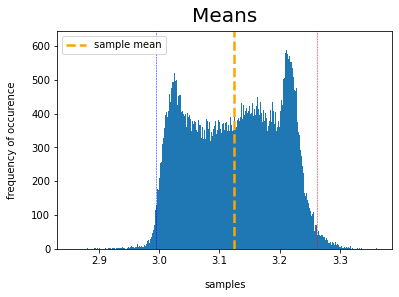

In [19]:
plt.hist(result_list,bins=500)

plt.title("Means", y=1.015, fontsize=20)
plt.axvline(x=sum(result_list)/len(result_list), linestyle='--', linewidth=2.5, label="sample mean", c='orange')
plt.xlabel("samples", labelpad=14)
plt.ylabel("frequency of occurence", labelpad=14)
plt.legend();

result_list.sort()

plt.axvline(x=result_list[int(len(result_list)*0.01)], linestyle='--', linewidth=0.5, label="1%", c='b')
plt.axvline(x=result_list[int(len(result_list)*0.99)], linestyle='--', linewidth=0.5, label="99%", c='r')


plt.show()

In [20]:
for param in net.parameters():
    print(param )

Parameter containing:
tensor([[ 0.3266, -0.1644, -0.0285],
        [-0.1908,  0.1431, -0.3577],
        [-0.0583,  0.2408,  0.0644],
        [-0.0259, -0.5380, -0.1050],
        [-0.3123, -0.1726, -0.0281],
        [ 0.1470,  0.0024,  0.1071],
        [-0.2471, -0.1313, -0.0592],
        [ 0.0501,  0.0476, -0.1122],
        [ 0.2427, -0.0664,  0.0454],
        [-0.1700,  0.3985, -0.0876],
        [-0.2652,  0.1484, -0.3502],
        [-0.0215,  0.1760, -0.2785],
        [ 0.0265, -0.1115,  0.4111],
        [-0.4171, -0.0124, -0.0236],
        [ 0.1057, -0.0993, -0.3191],
        [-0.0248,  0.0897,  0.2210],
        [-0.5240, -0.0802, -0.0347],
        [-0.1138, -0.2466,  0.2171],
        [ 0.0982, -0.1220, -0.1821],
        [ 0.1062,  0.0760, -0.2608],
        [ 0.0582, -0.2190, -0.0534],
        [-0.1281, -0.2769,  0.1921],
        [-0.0223,  0.1901, -0.0351],
        [ 0.1623, -0.3786, -0.0863],
        [-0.0271,  0.5068, -0.0604],
        [ 0.0603,  0.1903, -0.0698],
        [-0.1448